In [60]:
import pandas as pd
from transformers import pipeline

In [61]:
classifier = pipeline('zero-shot-classification', model='facebook/bart-large-mnli')
labels = ["bussiness","technology","science","sports","media and entertainment","politics","health","crime","accident","environment","art","literature","tragedy","education","fashion","food","travel","military","real estates","history","religion","celebrity"]
hypothesis_template = "this text is about {}"


In [67]:
# data = pd.read_csv('../preprocessed_data/cleaned_data_USA.csv')
data = pd.read_csv('../preprocessed_data/cleaned_data_Nigeria.csv')
# data = pd.read_csv('./test.csv')
dataFrame = data[['date','traffic','newsSnippet']]
strings_list = [item[2] for item in dataFrame.values.tolist()]
loop = range(len(strings_list))



In [68]:
results = []
batch_size = 4
for i in range(0, len(strings_list), batch_size):
    batch = strings_list[i:i+batch_size]
    predictions = classifier(batch, labels, hypothesis_template=hypothesis_template, multi_class=True)
    for j, prediction in enumerate(predictions):
        top_label = prediction['labels'][0]
        top_score = prediction['scores'][0]
        row_data = (dataFrame.iloc[i+j]['date'], dataFrame.iloc[i+j]['traffic'], dataFrame.iloc[i+j]['newsSnippet'], top_label, top_score)
        results.append(row_data)

df_results = pd.DataFrame(results, columns=['date', 'traffic', 'newsTitle', 'predicted_label', 'score'])
df_results.to_csv('./classification_output.csv', index=False)

The `multi_class` argument has been deprecated and renamed to `multi_label`. `multi_class` will be removed in a future version of Transformers.
The `multi_class` argument has been deprecated and renamed to `multi_label`. `multi_class` will be removed in a future version of Transformers.
The `multi_class` argument has been deprecated and renamed to `multi_label`. `multi_class` will be removed in a future version of Transformers.
The `multi_class` argument has been deprecated and renamed to `multi_label`. `multi_class` will be removed in a future version of Transformers.
The `multi_class` argument has been deprecated and renamed to `multi_label`. `multi_class` will be removed in a future version of Transformers.
The `multi_class` argument has been deprecated and renamed to `multi_label`. `multi_class` will be removed in a future version of Transformers.
The `multi_class` argument has been deprecated and renamed to `multi_label`. `multi_class` will be removed in a future version of Transf

In [82]:
import matplotlib.pyplot as plt

def clean_traffic(value):
    value = value.replace(",", "").replace("+", "").strip()
    return int(value)

data = pd.read_csv('./classification_output.csv')
df = data[['predicted_label','traffic']]
df['traffic_numeric'] = df['traffic'].apply(clean_traffic)

topic_stats = df.groupby('predicted_label')['traffic_numeric'].agg(['mean']).sort_values('mean',ascending=True)
topic_stats


C:\Users\alkrd\AppData\Local\Temp\ipykernel_16132\2139753877.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['traffic_numeric'] = df['traffic'].apply(clean_traffic)


,mean
predicted_label,
accident,2000.000000
real estates,2000.000000
fashion,2000.000000
art,2600.000000
military,2600.000000
bussiness,2857.142857
religion,3285.714286
literature,3500.000000
tragedy,4025.641026


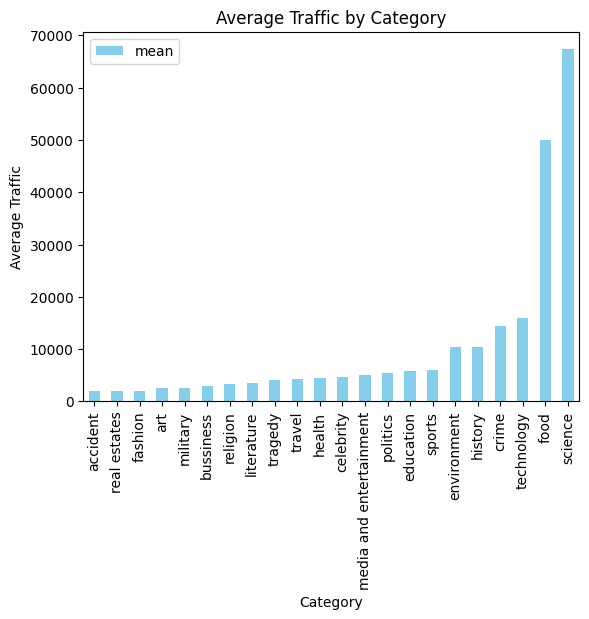

In [ ]:
topic_stats.plot(kind='bar', color='skyblue')
plt.xlabel('Category')
plt.ylabel('Average Traffic')
plt.title('Average Traffic by Category')
plt.xticks(rotation=90)
plt.show()

In [64]:
# sequence = "Ohio State football players safe accounted for after oncampus attack,COLUMBUS Ohio  An attack on Ohio States campus left 11 people injured Monday morning They were stabbed hit by a car or otherwise injured before the suspect was shot dead school and hospital officials said All Ohio State football players are"
# prediction = classifier(sequence, labels, hypothesis_template=hypothesis_template, multi_class=True)
# prediction['labels'][0]